In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.graphics.regressionplots import influence_plot
from numpy import set_printoptions #helps restrcit decimal places 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [143]:

file_path = r'C:\Users\Kashi\Downloads\ToyotaCorolla.csv'

# Read the CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [145]:
df.shape

(1436, 38)

In [146]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [147]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [148]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Color'] = le.fit_transform(df['Color'])
df['Model'] = le.fit_transform(df['Model'])
df.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,257,13500,23,10,2002,46986,1,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,257,13750,23,10,2002,72937,1,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,365,13950,24,9,2002,41711,1,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,257,14950,26,7,2002,48000,1,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,256,13750,30,3,2002,38500,1,90,0,...,1,1,1,0,1,0,1,0,0,0


In [149]:
df['Mfg_Year'].unique()

array([2002, 2003, 2004, 2001, 2000, 1999, 1998], dtype=int64)

In [150]:
df = df.drop('Id', axis = 1)

In [151]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [152]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [153]:
model = LinearRegression()
rfe = RFE(model)
fit = rfe.fit(x,y)

In [154]:
fit.n_features_

18

In [155]:
fit.support_

array([False,  True,  True,  True, False,  True, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True, False,  True, False,  True,  True, False])

In [156]:
fit.ranking_

array([16,  1,  1,  1, 18,  1,  9, 13,  8,  1, 17,  1, 19, 12, 11, 15,  1,
        1,  6,  1,  1, 10,  1,  1,  1,  2,  5,  1, 14,  1,  3,  1,  7,  1,
        1,  4])

In [157]:
r = {'f': x.columns, "f":fit.ranking_}
imp = pd.DataFrame(r)
imp.sort_values('f', inplace = True)
imp

,f
17,1
34,1
16,1
22,1
23,1
24,1
11,1
27,1
20,1
9,1


In [158]:
df1 = df.iloc[:,[17,34,16,22,23,24,11,27,20,9,31,3,5,33,2,1,29,19]]

In [159]:
df1.head()

,Mfr_Guarantee,Metallic_Rim,Weight,Airbag_2,Airco,Automatic_airco,cc,Central_Lock,ABS,Color,Mistlamps,Mfg_Month,KM,Backseat_Divider,Age_08_04,Price,Power_Steering,Guarantee_Period
0,0,0,1165,1,0,0,2000,1,1,2,0,10,46986,1,23,13500,1,3
1,0,0,1165,1,1,0,2000,1,1,6,0,10,72937,1,23,13750,1,3
2,1,0,1165,1,0,0,2000,0,1,2,0,9,41711,1,24,13950,1,3
3,1,0,1165,1,0,0,2000,0,1,1,0,7,48000,1,26,14950,1,3
4,1,0,1170,1,1,0,2000,1,1,1,1,3,38500,1,30,13750,1,3


In [160]:
x = df1.drop('Price', axis = 1)
y = df1['Price']

In [161]:
model = smf.ols('y~x', data = df1).fit()

In [162]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     698.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:31:58   Log-Likelihood:                -12200.
No. Observations:                1436   AIC:                         2.444e+04
Df Residuals:                    1418   BIC:                         2.453e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2417.2413    923.643      2.617      0.009     605.389    4229.094
x[0]         327.3645     67.962      4.817      0.000     194.049     460.680
x[1]         338.2885     86.337      3.918      0.000     168.926     507.651
x[2]          14.5896      0.787     18.530      0.000      13.045      16.134
x[3]         130.0272    119.201      1.091      0.276    -103.802     363.856
x[4]         286.6781     83.602      3.429      0.001     122.680     450.676
x[5]        2841.7049    170.317     16.685      0.000    2507.605    3175.805
x[6]          -0.0638      0.080     -0.797      0.426      -0.221       0.093
x[7]         321.4852     83.248      3.862      0.000     158.183     484.788
x[8]        -314.5805    118.250     -2.660      0.008    -546.544     -82.618
x[9]         -19.7643     18.871     -1.047      0.295     -56.783      17.254
x[10]        -83.6369     99.612     -0.840      0.401    -279.039     111.766
x[11]        -95.2236      9.604     -9.915      0.000    -114.063     -76.384
x[12]         -0.0198      0.001    -18.940      0.000      -0.022      -0.018
x[13]        221.9634    107.963      2.056      0.040      10.179     433.748
x[14]       -110.8722      2.794    -39.677      0.000    -116.354    -105.391
x[15]        -39.9610    229.777     -0.174      0.862    -490.700     410.778
x[16]         73.2864     12.734      5.755      0.000      48.308      98.265
==============================================================================
Omnibus:                      224.431   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2328.205
Skew:                          -0.369   Prob(JB):                         0.00
Kurtosis:                       9.194   Cond. No.                     2.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
model1 = smf.ols('y~Airbag_2', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     94.77
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           9.92e-22
Time:                        19:31:58   Log-Likelihood:                -13761.
No. Observations:                1436   AIC:                         2.753e+04
Df Residuals:                    1434   BIC:                         2.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9273.0075    176.140     52.646      0.000    8927.488    9618.527
Airbag_2    2016.7873    207.174      9.735      0.000    1610.390    2423.184
==============================================================================
Omnibus:                      494.836   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1646.882
Skew:                           1.710   Prob(JB):                         0.00
Kurtosis:                       6.979   Cond. No.                         3.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
model2 = smf.ols('y~cc', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.55e-06
Time:                        19:31:58   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
model3 = smf.ols('y~Color', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.827
Date:                Wed, 29 Nov 2023   Prob (F-statistic):             0.0506
Time:                        19:31:58   Log-Likelihood:                -13805.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.112e+04    219.501     50.648      0.000    1.07e+04    1.15e+04
Color       -109.9945     56.228     -1.956      0.051    -220.292       0.303
==============================================================================
Omnibus:                      487.262   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1545.125
Skew:                           1.705   Prob(JB):                         0.00
Kurtosis:                       6.768   Cond. No.                         9.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
model4 = smf.ols('y~Mistlamps', data = df1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     74.40
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.67e-17
Time:                        19:31:58   Log-Likelihood:                -13770.
No. Observations:                1436   AIC:                         2.754e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.026e+04    108.300     94.712      0.000       1e+04    1.05e+04
Mistlamps   1842.7460    213.645      8.625      0.000    1423.655    2261.837
==============================================================================
Omnibus:                      457.518   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.733
Skew:                           1.634   Prob(JB):                    4.86e-289
Kurtosis:                       6.392   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
model5 = smf.ols('y~Age_08_04', data = df1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:31:58   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
model6 = smf.ols('y~Age_08_04+Mistlamps+cc+Airbag_2+Color', data = df1).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1056.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:32:16   Log-Likelihood:                -12697.
No. Observations:                1436   AIC:                         2.541e+04
Df Residuals:                    1430   BIC:                         2.544e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.004e+04    276.702     72.422      0.000    1.95e+04    2.06e+04
Age_08_04   -171.5611      2.536    -67.644      0.000    -176.536    -166.586
Mistlamps   1030.5824    105.035      9.812      0.000     824.543    1236.621
cc             0.3389      0.105      3.232      0.001       0.133       0.545
Airbag_2    -572.3351    106.912     -5.353      0.000    -782.057    -362.613
Color        -27.2224     26.278     -1.036      0.300     -78.770      24.325
==============================================================================
Omnibus:                      316.775   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2587.045
Skew:                           0.791   Prob(JB):                         0.00
Kurtosis:                       9.383   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
model10 = LinearRegression()
rfe1= RFE(model)
fit1 = rfe.fit(x,y)

In [176]:
fit1.n_features_

8

In [178]:
fit1.ranking_

array([ 1,  1,  8,  6,  1,  1,  9,  1,  1,  7,  3,  1, 10,  4,  1,  2,  5])

In [181]:
r = {'f': x.columns, "v":fit1.ranking_}
imp = pd.DataFrame(r)
imp.sort_values('f', inplace = True)
imp

,f,v
8,ABS,1
14,Age_08_04,1
3,Airbag_2,6
4,Airco,1
5,Automatic_airco,1
13,Backseat_Divider,4
7,Central_Lock,1
9,Color,7
16,Guarantee_Period,5
12,KM,10


In [184]:
df2 = df1.iloc[:,[8,14,4,5,7,1,11,0,15]]
df2.head()

,ABS,Age_08_04,Airco,Automatic_airco,Central_Lock,Metallic_Rim,Mfg_Month,Mfr_Guarantee,Price
0,1,23,0,0,1,0,10,0,13500
1,1,23,1,0,1,0,10,0,13750
2,1,24,0,0,0,0,9,1,13950
3,1,26,0,0,0,0,7,1,14950
4,1,30,1,0,1,0,3,1,13750


In [188]:
x1 = df2.drop('Price', axis = 1)
y1 = df2['Price']

In [189]:
model11 = smf.ols('y1~x1', data = df2).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     997.5
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:41:00   Log-Likelihood:                -12453.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1427   BIC:                         2.497e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.935e+04    234.490     82.510      0.000    1.89e+04    1.98e+04
x1[0]       -519.4222    106.569     -4.874      0.000    -728.470    -310.374
x1[1]       -150.2740      2.604    -57.702      0.000    -155.383    -145.165
x1[2]        287.0121     94.721      3.030      0.002     101.204     472.820
x1[3]       3669.8366    182.146     20.148      0.000    3312.534    4027.139
x1[4]        407.3146     92.454      4.406      0.000     225.954     588.675
x1[5]        312.3907     97.862      3.192      0.001     120.421     504.360
x1[6]       -109.1597     11.325     -9.639      0.000    -131.374     -86.945
x1[7]        404.3311     77.266      5.233      0.000     252.764     555.898
==============================================================================
Omnibus:                      247.620   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2872.461
Skew:                           0.422   Prob(JB):                         0.00
Kurtosis:                       9.877   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
#feature extraction 
#univraiate selection 
test = SelectKBest(score_func=chi2, k =10)
fit = test.fit(x,y)
#summarise scores 
set_printoptions(precision = 7)
print(fit.scores_)



[1.7946388e+02 2.4577361e+02 2.1852603e+03 8.3723620e+01 2.3636633e+02
 9.2064720e+02 1.9192252e+04 1.4911302e+02 6.8642193e+01 2.1704551e+02
 2.2996551e+02 4.9407103e+02 1.4015955e+07 6.2158208e+01 7.6064537e+03
 3.0854165e+00 1.5314906e+03]


In [170]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.0484129 0.0238258 0.1164353 0.0278926 0.0348139 0.003477  0.0410078
 0.0359667 0.0177719 0.1088553 0.0230005 0.0877551 0.2579491 0.0230244
 0.126426  0.0024105 0.0209754]


In [171]:
d = {'f': x.columns, "v":model.feature_importances_}
imp = pd.DataFrame(d)
imp.sort_values('v', ascending=False, inplace = True)
imp

,f,v
12,KM,0.257949
14,Age_08_04,0.126426
2,Weight,0.116435
9,Color,0.108855
11,Mfg_Month,0.087755
0,Mfr_Guarantee,0.048413
6,cc,0.041008
7,Central_Lock,0.035967
4,Airco,0.034814
3,Airbag_2,0.027893


In [190]:
model11.fittedvalues

0       14687.688483
1       14974.700548
2       14643.590620
3       14561.361976
4       15091.231386
            ...     
1431     8248.106683
1432     7026.105922
1433     7586.642399
1434     8032.087816
1435     7381.070787
Length: 1436, dtype: float64

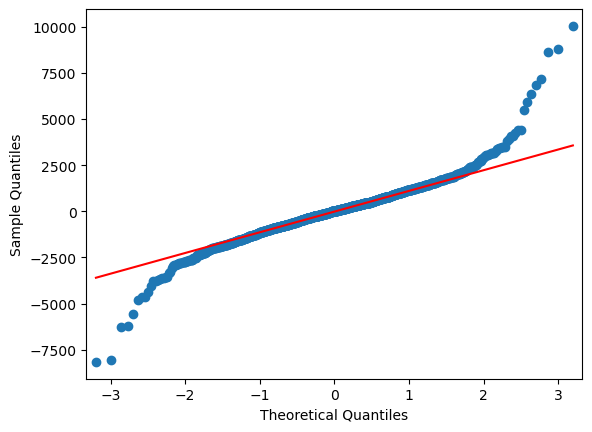

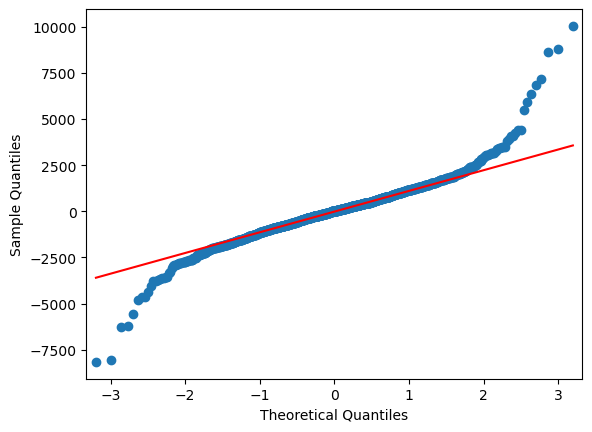

In [191]:
qqplot = sm.qqplot(model11.resid,line = 'q')
qqplot